In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Avadhoot/Day2.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

display(df.head())
df.info()


,open,high,low,close,volume
date,,,,,
2015-01-09 09:15:00,16.47,16.47,14.46,15.39,0
2015-01-09 09:16:00,15.39,15.47,15.33,15.45,0
2015-01-09 09:17:00,15.45,15.51,15.41,15.46,0
2015-01-09 09:18:00,15.46,15.50,15.33,15.40,0
2015-01-09 09:19:00,15.39,15.40,15.29,15.35,0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 978081 entries, 2015-01-09 09:15:00 to 2025-08-06 17:56:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    978081 non-null  float64
 1   high    978081 non-null  float64
 2   low     978081 non-null  float64
 3   close   978081 non-null  float64
 4   volume  978081 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 44.8 MB


,open,high,low,close,volume,Returns/minute
date,,,,,,
2015-01-09 09:15:00,16.47,16.47,14.46,15.39,0,NaN
2015-01-09 09:16:00,15.39,15.47,15.33,15.45,0,0.003899
2015-01-09 09:17:00,15.45,15.51,15.41,15.46,0,0.000647
2015-01-09 09:18:00,15.46,15.50,15.33,15.40,0,-0.003881
2015-01-09 09:19:00,15.39,15.40,15.29,15.35,0,-0.003247


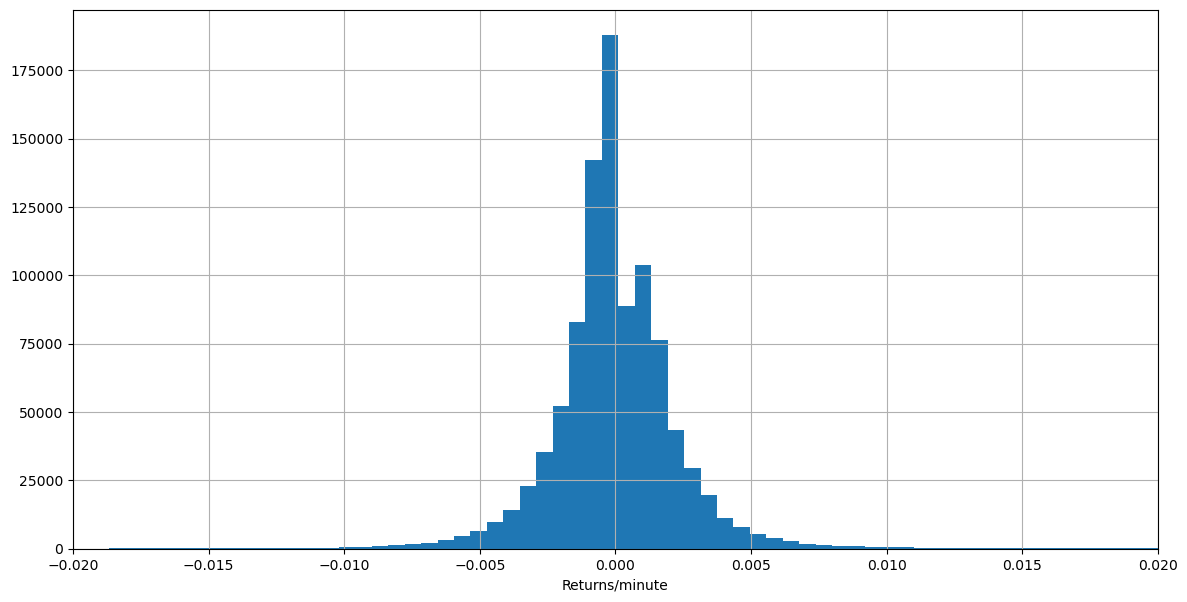

In [3]:
df['Returns/minute'] = df['close'].pct_change()
display(df.head())
plt.figure(figsize = (14,7))
plt.hist((df['Returns/minute']).dropna(), bins =1000)
plt.xlim(-0.02,0.02)
plt.xlabel('Returns/minute')
plt.grid(True)
plt.show()

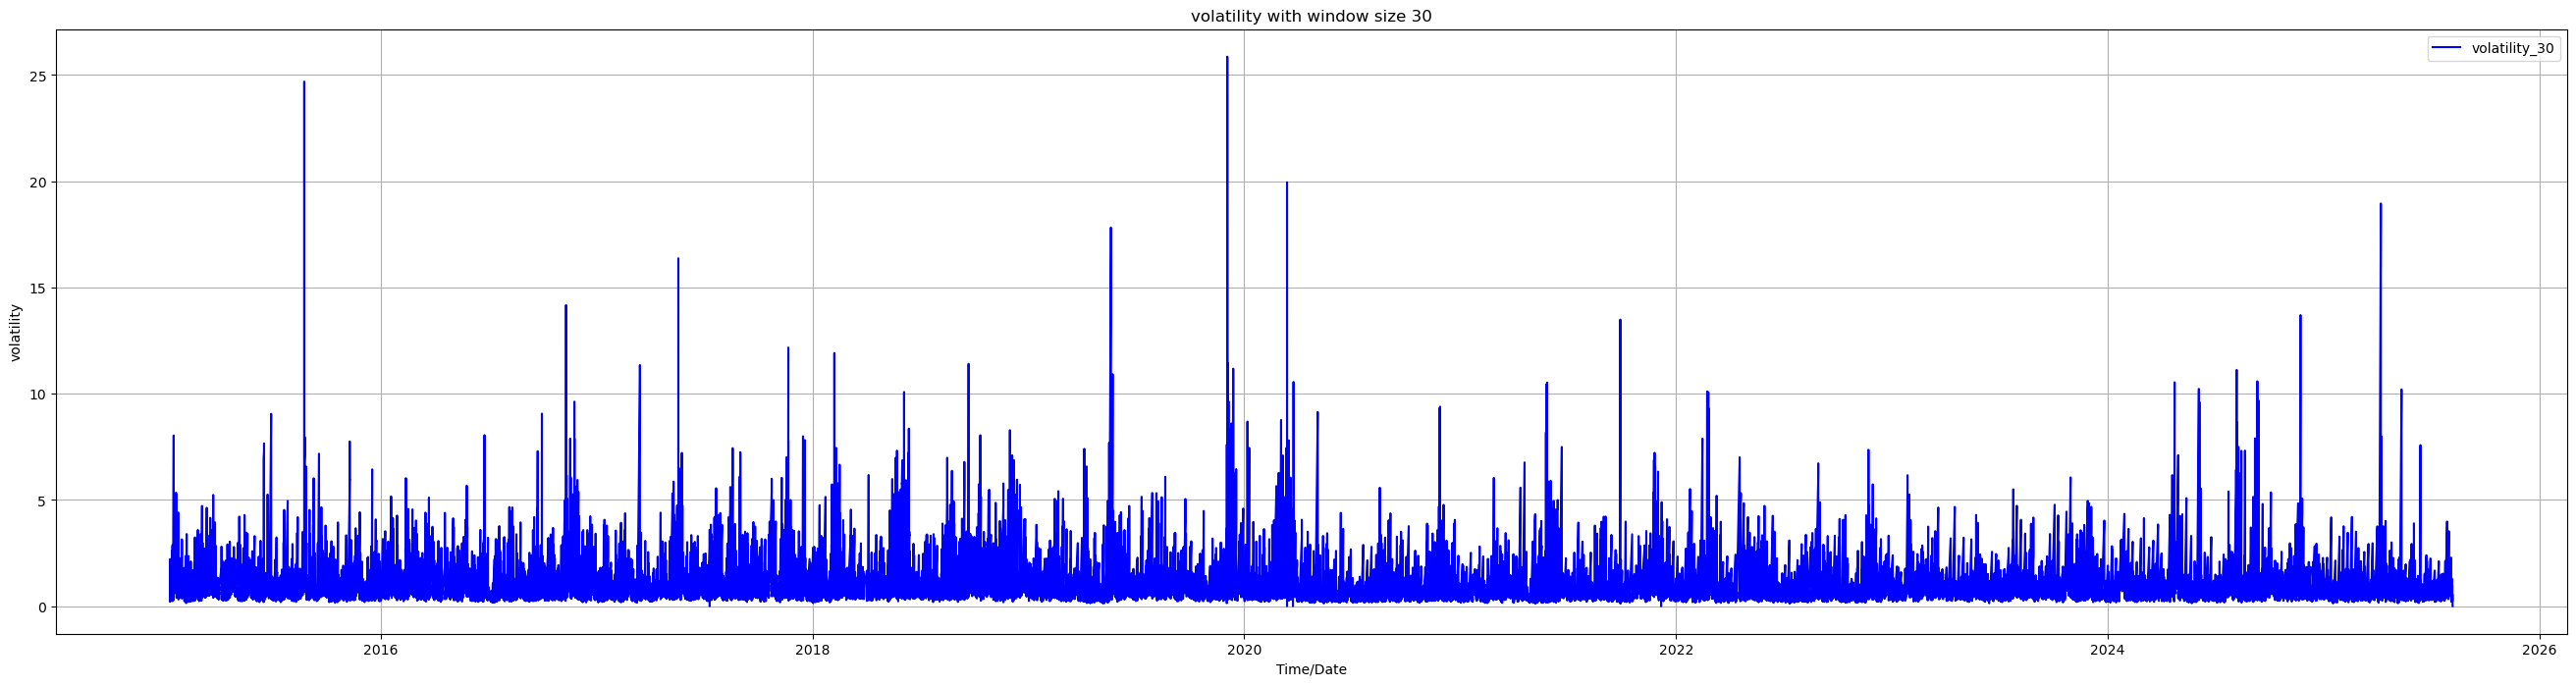

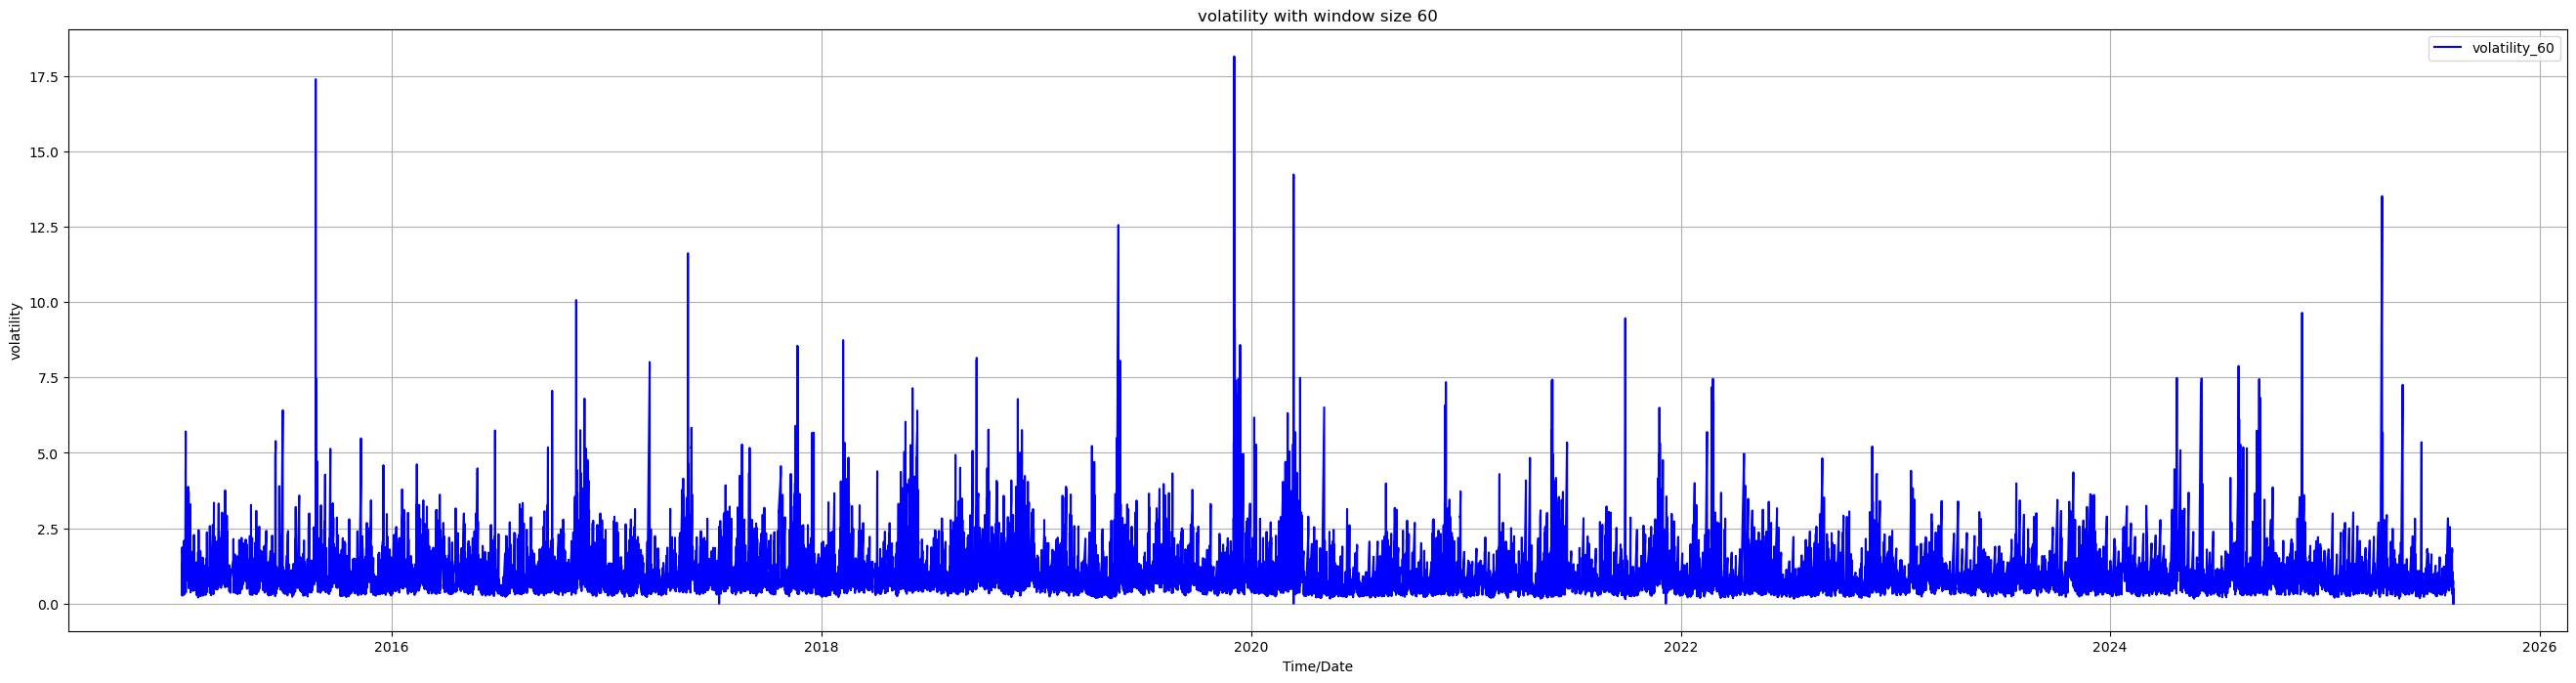

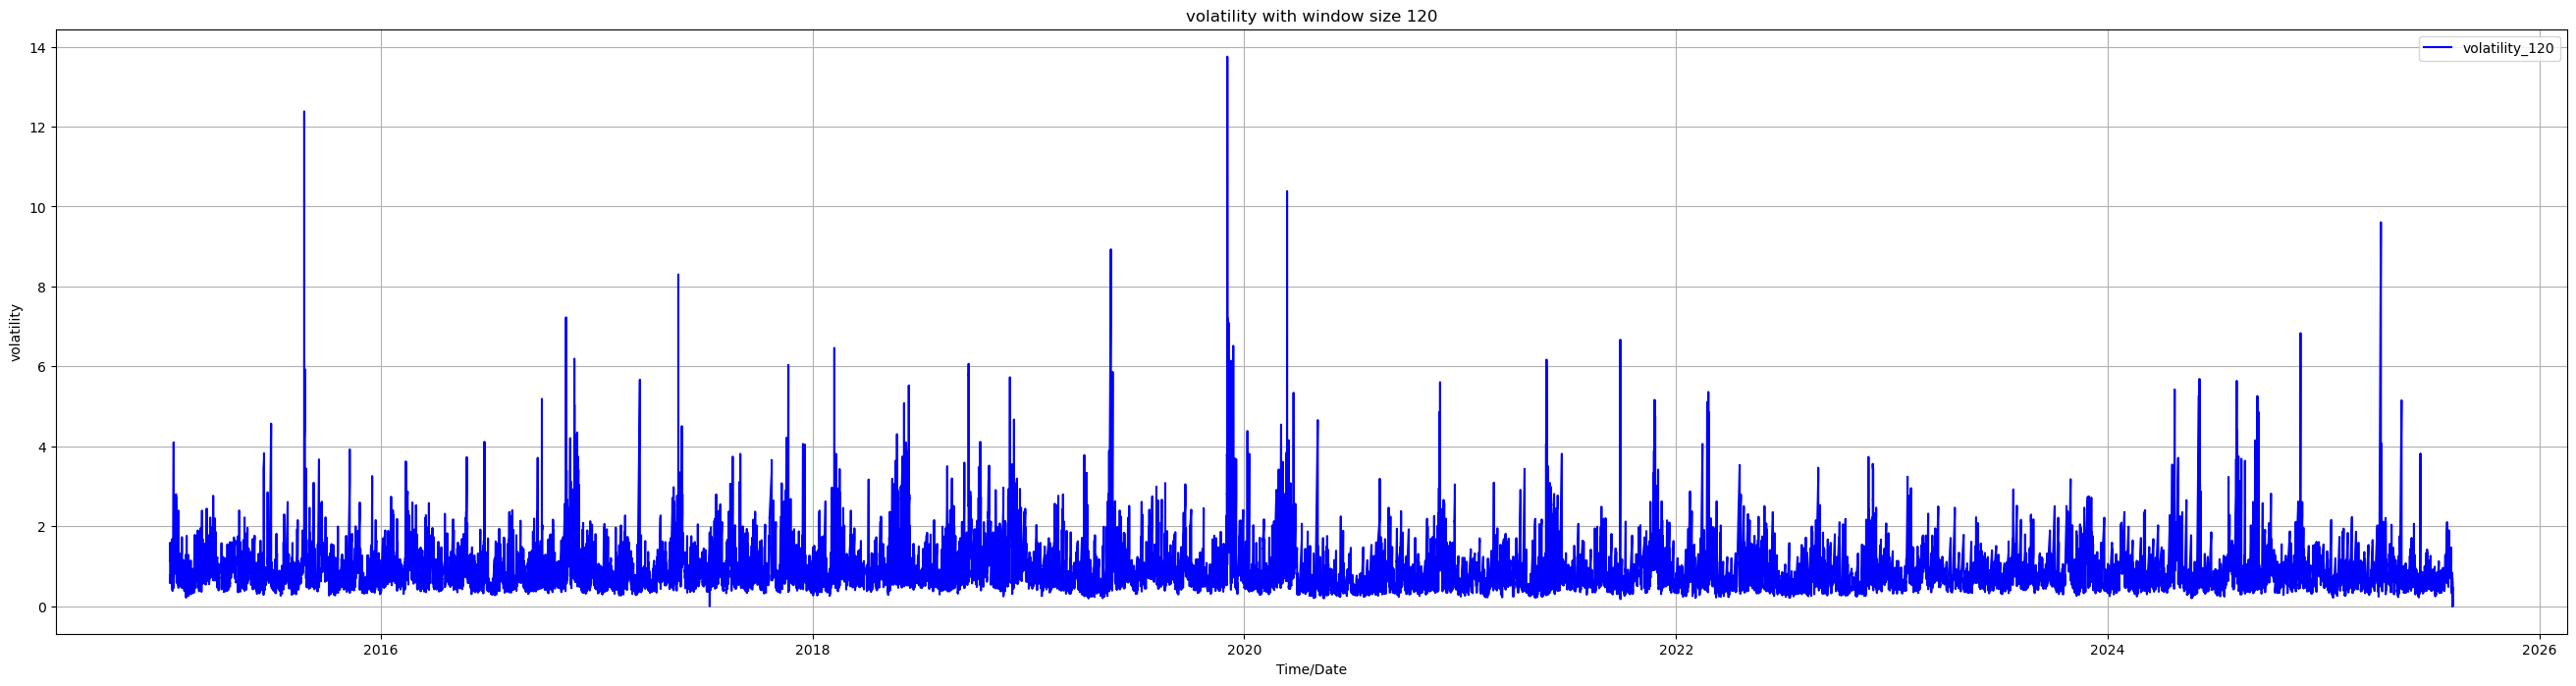

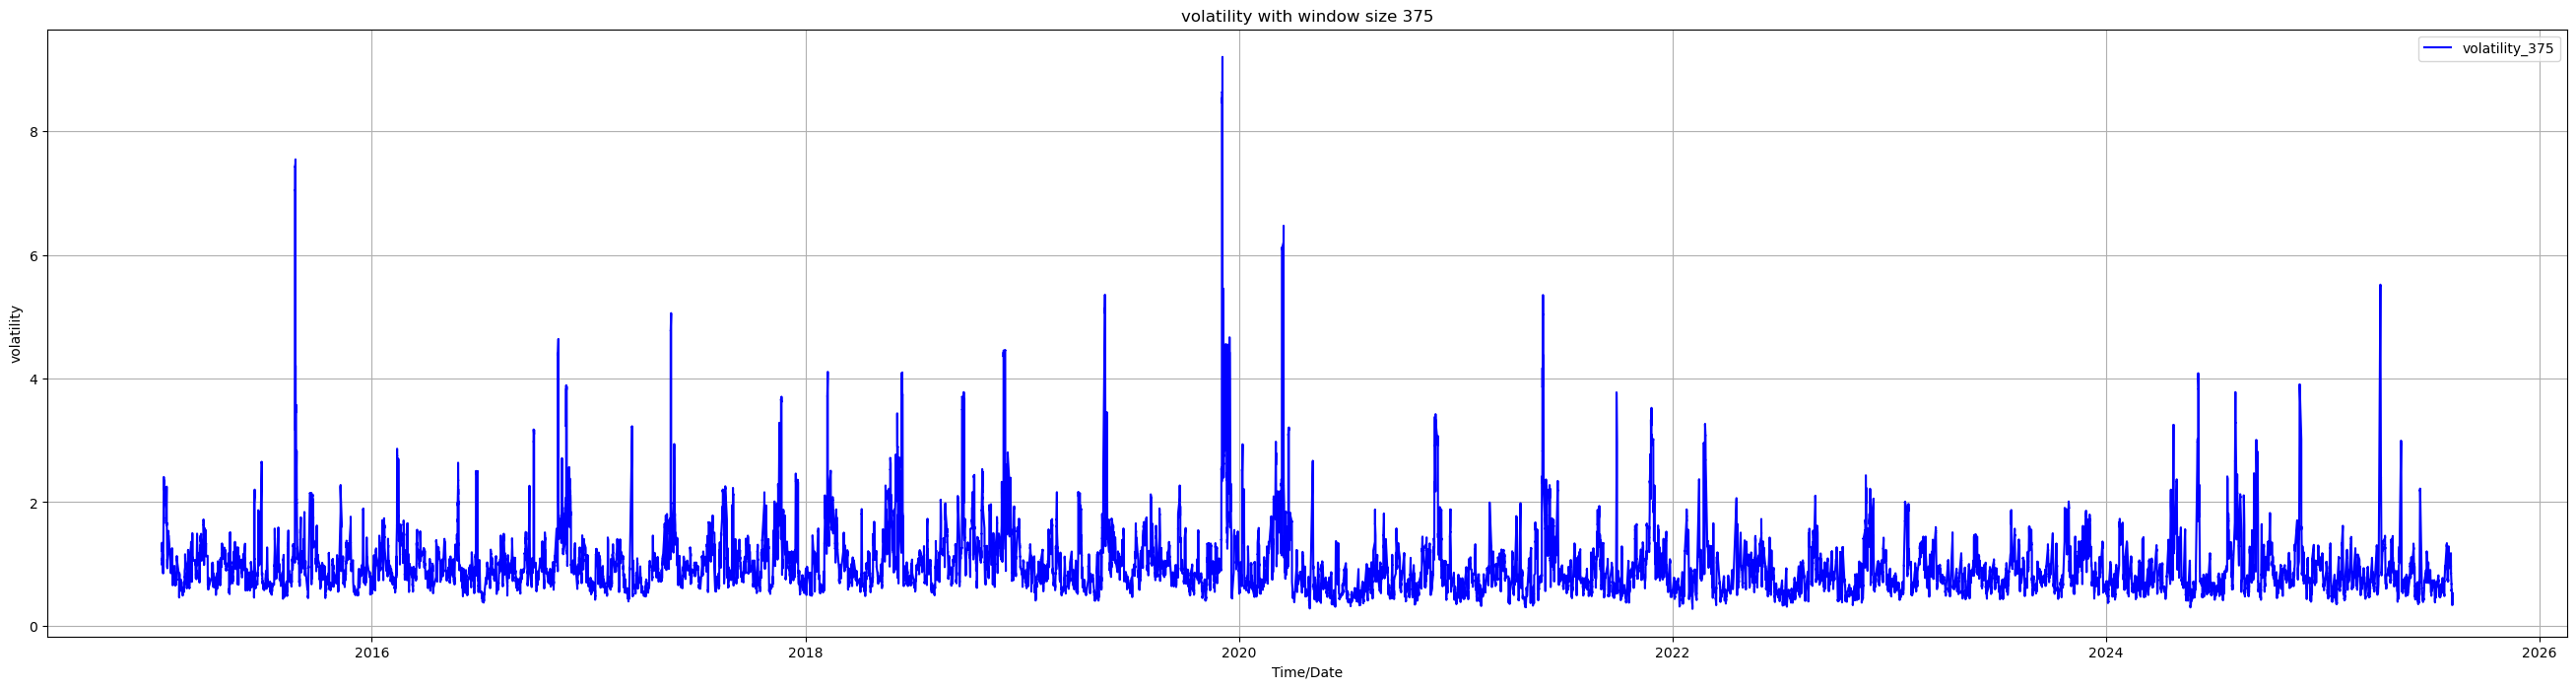

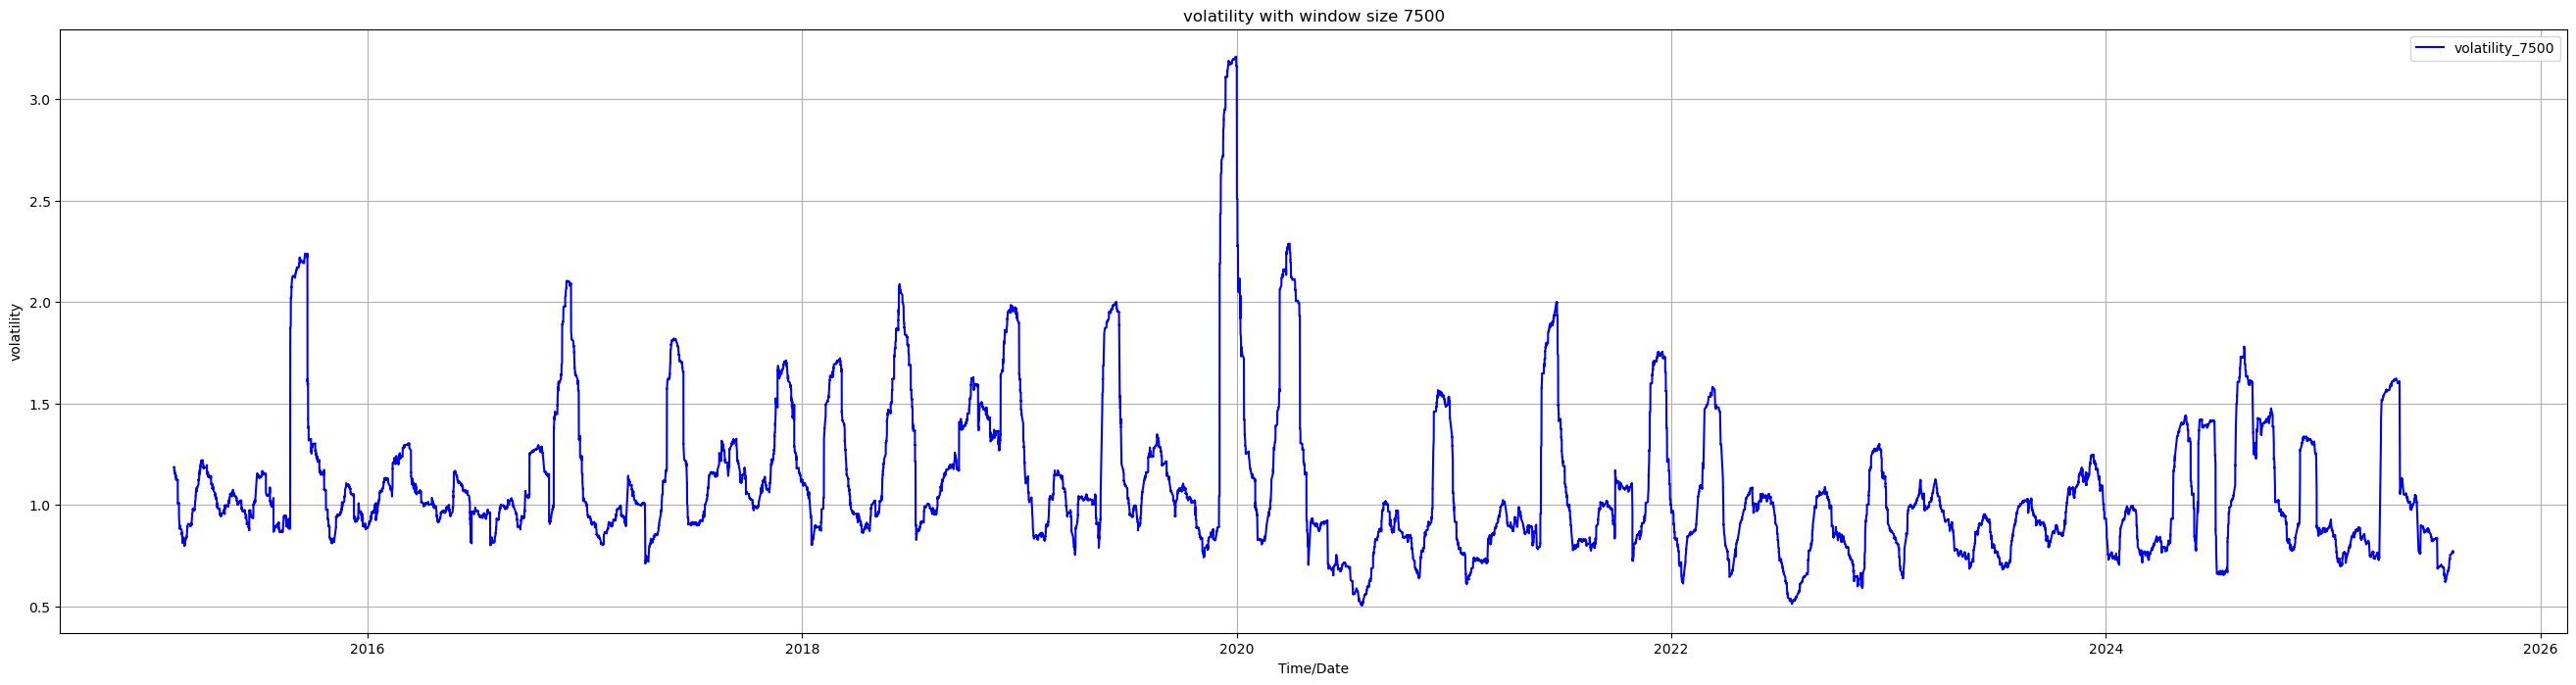

The cluster of volatility is evidenced by the following autocorrelation values: lag=  1 : 0.13862090807429875
The cluster of volatility is evidenced by the following autocorrelation values: lag=  5 : 0.04284963966998101
The cluster of volatility is evidenced by the following autocorrelation values: lag=  10 : 0.024268700667579888
The cluster of volatility is evidenced by the following autocorrelation values: lag=  30 : 0.004321043980012367
The cluster of volatility is evidenced by the following autocorrelation values: lag=  60 : 0.005903268677683626
The cluster of volatility is evidenced by the following autocorrelation values: lag=  120 : 0.0013759476719391516


In [10]:
windows = [30,60, 120, 375, 7500]

for w in windows:
    df[f'Volatility_{w}'] = (df['Returns/minute'].rolling(window=w).std())*((252*390)**0.5)
    plt.figure(figsize=(33,8))
    plt.plot(df[f'Volatility_{w}'], label = f'volatility_{w}', color = 'blue')
    plt.title(f'volatility with window size {w}')
    plt.xlabel('Time/Date')
    plt.ylabel('volatility')
    plt.legend()
    plt.grid(True)
    plt.show()
lags = [1,5,10,30,60,120]
for i in lags:
    print("The cluster of volatility is evidenced by the following autocorrelation values: lag= " , i, ":", ((df['Returns/minute'])**2).dropna().autocorr(lag=i))

